## Regression, underfitting, overfitting with supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

![Screen%20Shot%202022-05-01%20at%2010.48.48.png](attachment:Screen%20Shot%202022-05-01%20at%2010.48.48.png)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

These are some (synthetic but realistic; see textbook) supernova data

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\371227917.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


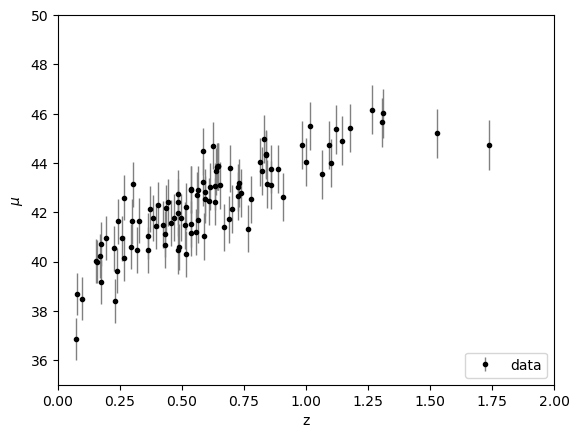

In [2]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### OPTIONAL
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

[My exploration](https://github.com/dgerosa/astrostatistics_bicocca_2025/blob/main/solutions/S17_supernovae1.ipynb)

## My work

Repeat

In [3]:
from astroML.datasets import generate_mu_z
import numpy as np
import matplotlib.pyplot as plt

from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
from sklearn.model_selection import train_test_split


c:\Users\simon\anaconda3\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\450522119.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$ (distance)")


(100,)
(100,)


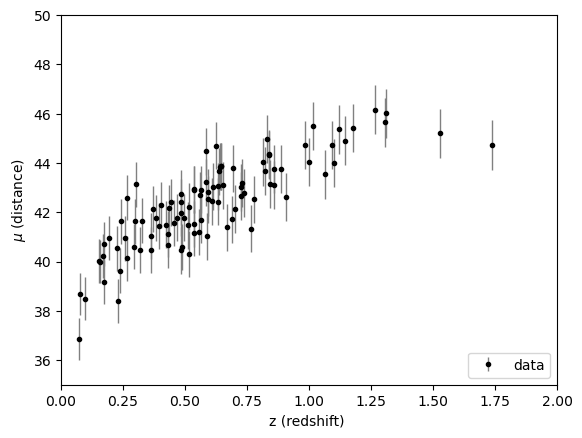

In [4]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z (redshift) ")
plt.ylabel("$\mu$ (distance)")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

print(z_sample.shape)
print(mu_sample.shape)

### Fit with astroML.linear_model.LinearRegression

(Oss: I don't use  LinearRegression bc doesn't have eteroschedastic errors)

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\3728787425.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

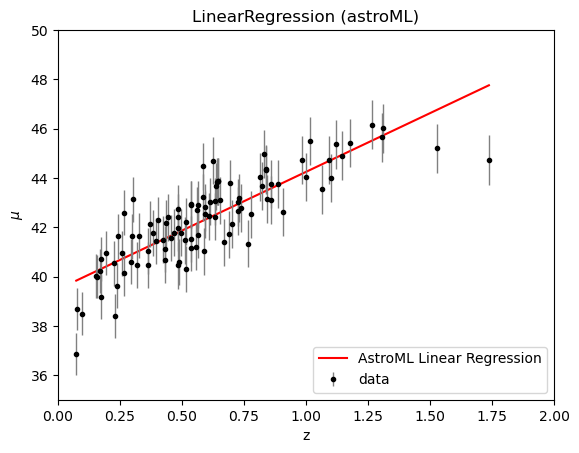

In [5]:
z_sample = z_sample.reshape(-1, 1)

# Fit con astroML
lin_reg = LinearRegression()
lin_reg.fit(z_sample, mu_sample, y_error=dmu)

# Grid of values to plot the line
z_line = np.linspace(z_sample.min(), z_sample.max(), 100).reshape(-1, 1)
# Predict values of mu given z
mu_pred = lin_reg.predict(z_line)

# Plot
plt.plot(z_line, mu_pred, color='red', label='AstroML Linear Regression')
plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title("LinearRegression (astroML)")
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)


### Fit with polynomial regression

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\1187379124.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

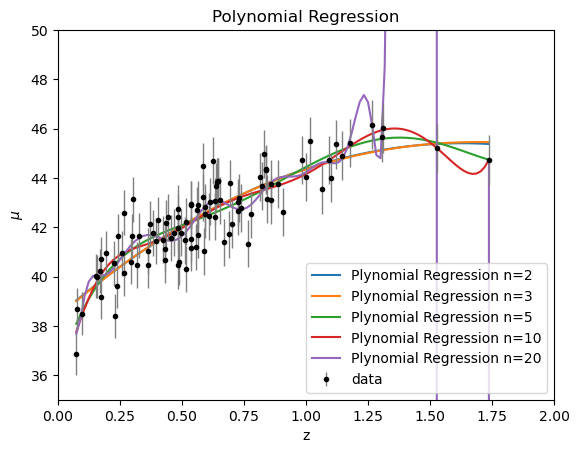

In [6]:
for degree in [2, 3, 5, 10, 20]:

    pol_reg = PolynomialRegression(degree)
    pol_reg.fit(z_sample, mu_sample, y_error=dmu)

    mu_pred = pol_reg.predict(z_line)

    # Plot
    plt.plot(z_line, mu_pred, label='Plynomial Regression n='+str(degree))

plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title("Polynomial Regression")
plt.legend()
plt.xlim(0, 2)
plt.ylim(35, 50)


### Fit with Basis Function Regression

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\1370593402.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

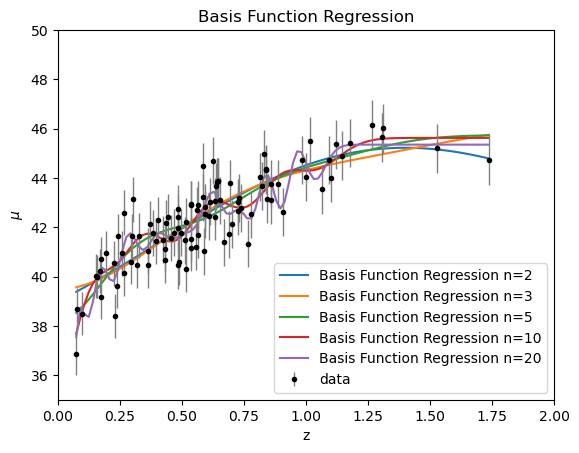

In [7]:
for n in [2, 3, 5, 10, 20]:
    # mean positions of the 10 Gaussians in the model
    basis_mu = np.linspace(0,1,n)[:, None]
    # widths of these Gaussians (I choose sigma= difference beetween mu of gaussians)
    basis_sigma = (basis_mu[1] - basis_mu[0])

    basis_reg = BasisFunctionRegression('gaussian', mu=basis_mu, sigma=basis_sigma)
    basis_reg.fit(z_sample, mu_sample, y_error=dmu)

    mu_pred = basis_reg.predict(z_line)

    # Plot
    plt.plot(z_line, mu_pred, label='Basis Function Regression n='+str(n))

plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title("Basis Function Regression")
plt.legend()
plt.xlim(0, 2)
plt.ylim(35, 50)


### Kernel Regression

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\578042518.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

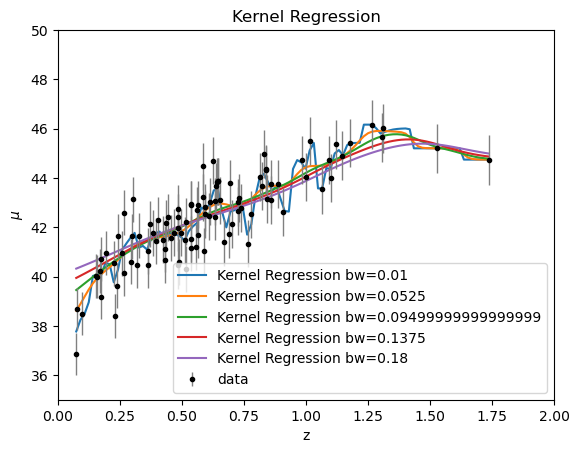

In [8]:
for bw in np.linspace(0.01, 0.18, 5):

    kernel_reg = NadarayaWatson(kernel='gaussian', h=bw)
    kernel_reg.fit(z_sample, mu_sample)

    mu_pred = kernel_reg.predict(z_line)

    # Plot
    plt.plot(z_line, mu_pred, label='Kernel Regression bw='+str(bw))

plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title("Kernel Regression")
plt.legend()
plt.xlim(0, 2)
plt.ylim(35, 50)


### Estimate POLYNOMIAL fit with test/train splitting (it's not a K-fold cross validation, which would be better)

Split data in 
- training set = 70% of data
- validation set = 30% of data  

In [9]:
# return X_train, y_train, dy_train, X_validation, y_validation, dy_validation
print("Check z_sample shape: ", z_sample.shape)
X = z_sample
y = mu_sample
dy = dmu

# (I reshape y,dy in a vector (N, 2) to use train_test_split )
X_train, X_validation, ydy_train, ydy_validation = train_test_split(X, np.array([y,dy]).T, test_size=0.3, random_state=42) # use train_test_split from sklearn to split data randomly into training and validation sets

# split back the combined [y, dy] arrays into separate vectors
y_train,dy_train = ydy_train.T
y_validation,dy_validation = ydy_validation.T

Check z_sample shape:  (100, 1)


In [10]:
# Function that return error_train, error_validation, mu_prediction. I iterate it changing N degree of fitting polynome 
def fitanderror(regression_method, X_train, y_train, dy_train, X_validation, y_validation):
    regression_method.fit(X_train, y_train, y_error=dy_train) # I fit using only the training set data !!! (from here the difference between error_train and error_validation)
    error_train = np.sqrt( np.sum(( y_train - regression_method.predict(X_train) )**2) / len(X_train) )
    error_validation  = np.sqrt( np.sum(( y_validation - regression_method.predict(X_validation) )**2) / len(X_validation) )

    mu_pred = regression_method.predict(z_line)
    return error_train, error_validation, mu_pred

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\4227925073.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

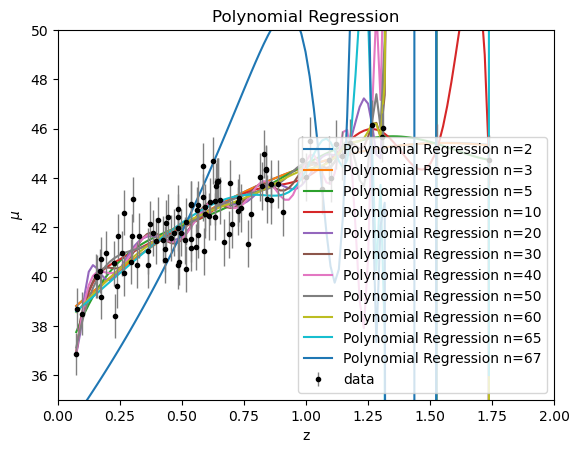

In [11]:
v_errortrain, v_errorvalidation= [], []
v_degree = [2, 3, 5, 10, 20, 30, 40, 50, 60, 65, 67]

for degree in v_degree :
    regression_method = PolynomialRegression(degree)
    error_train, error_validation, mu_pred = fitanderror(regression_method, X_train, y_train, dy_train, X_validation, y_validation)
    # print("Polynomial Regression n=", n, error_train, error_validation)
    v_errortrain.append(error_train)
    v_errorvalidation.append(error_validation) 
    
    # Plot
    plt.plot(z_line, mu_pred, label='Polynomial Regression n='+str(degree))

plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title("Polynomial Regression")
plt.legend()
plt.xlim(0, 2)
plt.ylim(35, 50)

(0.5, 3.0)

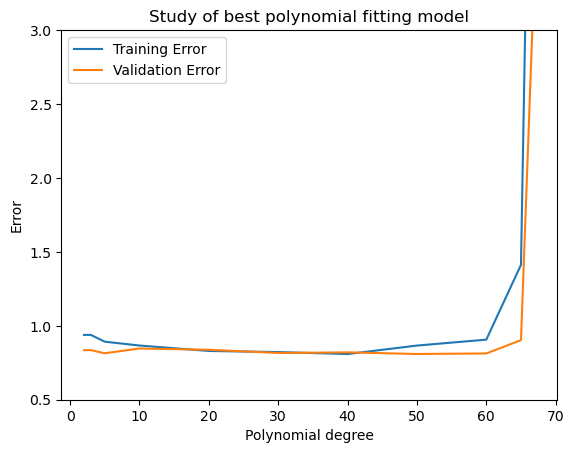

In [12]:
plt.plot( v_degree, v_errortrain, label='Training Error')
plt.plot( v_degree, v_errorvalidation, label='Validation Error')
plt.title("Study of best polynomial fitting model")
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.legend()
plt.ylim(0.5, 3)

!!!!!!!!!!!!!!!!! I don't understand the andamento...in theory I have to have
- Training error smaller with a lot of degree
- Validation error become higher with a lot of degree (high variance)

Firstly Validation Error diverge only after n=60...instead it seems overfit also with n=10   
Morevore, here training error diverge too with a lot of parameters  
But it's like Gerosa's solutions....

Anyway Validation Error decide which model degree is better. I mnimize it to find best model degree.

In [13]:
print("Minimum error test = ", min(v_errorvalidation))
best_degree = v_degree[np.argmin(v_errorvalidation)]
print("Polynomial degree with minimum error test = ", best_degree)

Minimum error test =  0.809339540798216
Polynomial degree with minimum error test =  50


I don't think n=50 is the best degree...it's overfitting. I show the fit with n=50

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_14160\3026766001.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

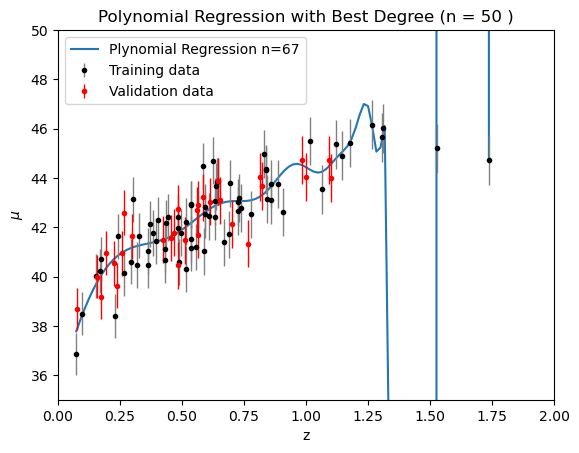

In [14]:
pol_reg = PolynomialRegression(best_degree)
pol_reg.fit(z_sample, mu_sample, y_error=dmu)

mu_pred = pol_reg.predict(z_line)

# Plot
plt.plot(z_line, mu_pred, label='Plynomial Regression n='+str(degree))

# Plot traning and validation data with two differents colour
plt.errorbar(X_train, y_train, dy_train, fmt='.k', ecolor='gray', lw=1,label='Training data')
plt.errorbar(X_validation, y_validation, dy_validation, fmt='.r', ecolor='red', lw=1, label='Validation data')

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title(f"Polynomial Regression with Best Degree (n = {best_degree} )")
plt.legend()
plt.xlim(0, 2)
plt.ylim(35, 50)